$\text{Multiple Qubits Quantum Gates}$

In [56]:
#Importing

import qiskit
import numpy as np
import math
from qiskit import QuantumCircuit,QuantumRegister,transpile
from qiskit.quantum_info import DensityMatrix, Operator
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, plot_state_city, plot_state_qsphere
from qiskit.quantum_info import Statevector
from  math import pi, sqrt

mpl = 'mpl'


$\text{Quantum CNOT Gate}$

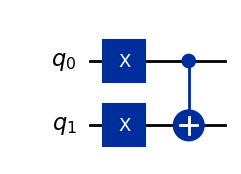

In [57]:
#CX gate on |11> = |10> (|01> according to qiskit ordering)

qc_cx = QuantumCircuit(2, name='qc')
qc_cx.x(0) # X gate on the first qubit
qc_cx.x(1) # X gate on the second qubit
qc_cx.cx(0,1) # CX gate with the first bit as control and the second bit as target 
qc_cx.draw('mpl')

$\text{density matrix plot for CNOT gate}$

the quantum state is:  Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


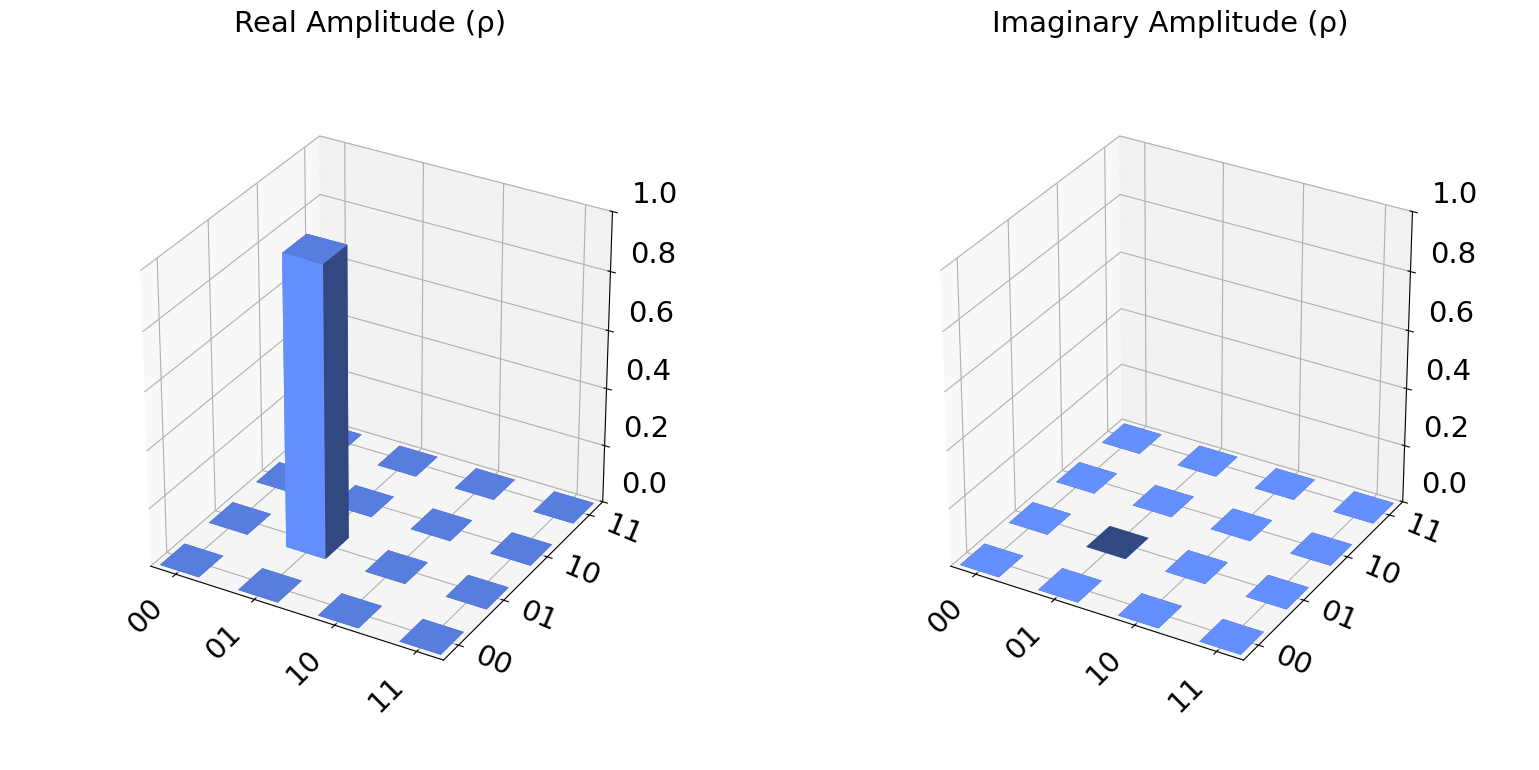

In [58]:
simulator_gate = Aer.get_backend('statevector_simulator')

#execute the circuit
job_state = simulator_gate.run(qc_cx)

#take the result from the job
result = job_state.result()

#return counts
psi = result.get_statevector(qc_cx)

print('the quantum state is: ', psi)

#plot the density matrix plot
plot_state_city(psi)


$\text{Qsphere plot for the CX gate}$

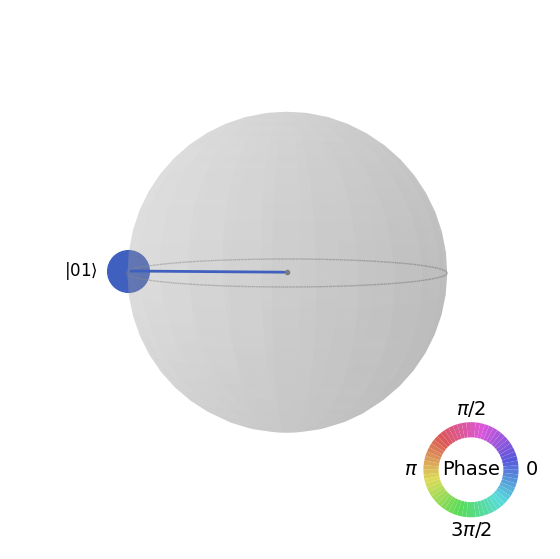

In [59]:
#plot the qsphee

psi = result.get_statevector(qc_cx)
plot_state_qsphere(psi)

$\text{Unitary Matrix for the CX gate}$

In [60]:
#unitary

backend = Aer.get_backend('unitary_simulator')

cx_unitary = backend.run(qc_cx).result().get_unitary(qc_cx, decimals=3)

print("Circuit unitary:\n", np.asarray(cx_unitary).round(5))

Circuit unitary:
 [[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [61]:

qc_cx = QuantumCircuit(2, name='qc')
qc_cx.x(0) # X gate on the first qubit
qc_cx.x(1) # X gate on the second qubit
qc_cx.cx(0,1) # CX gate with the first bit as control and the second bit as target 

circOp = Operator.from_circuit(qc_cx)
circOp.draw("latex")

<IPython.core.display.Latex object>

$\text{Running CNOT gate using QASM simulator}$

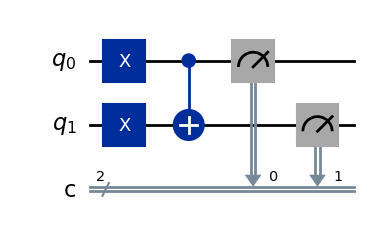

In [62]:
#CNOT with measurement 

qc_cx = QuantumCircuit(2,2,name='qc')
qc_cx.x(1)
qc_cx.x(0)
qc_cx.cx(0,1)

qc_cx.measure([0,1], [0,1])

qc_cx.draw('mpl')


the total counts are:  {'01': 1000}


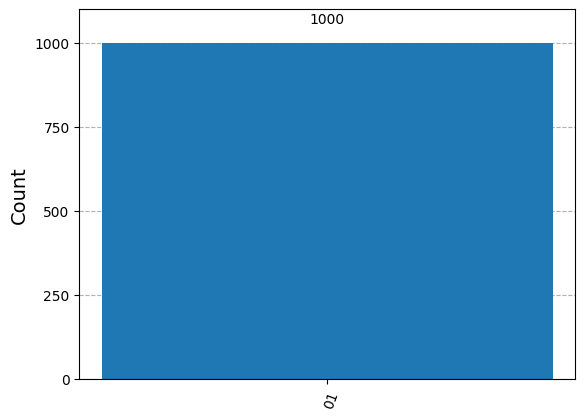

In [63]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

job = backend.run(qc_cx, shots=1000)
result = job.result()

counts = result.get_counts(qc_cx)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{CNOT gate using CZ gate and H gate}$

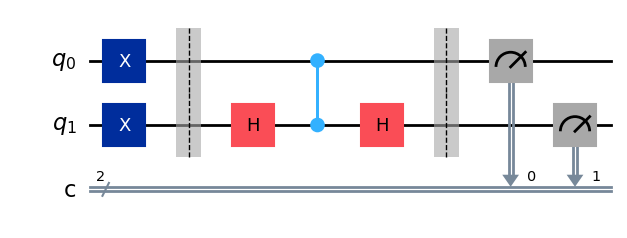

In [64]:
#CNOT with measurement

qc_cx = QuantumCircuit(2,2,name='qc')
qc_cx.x(0)
qc_cx.x(1)
qc_cx.barrier()
qc_cx.h(1)
qc_cx.cz(0,1) #CZ gate
qc_cx.h(1) # H gate on the second qubit
qc_cx.barrier()
qc_cx.measure([0,1], [0,1])
qc_cx.draw('mpl')

$\text{QASM}$

the total counts are:  {'01': 1000}


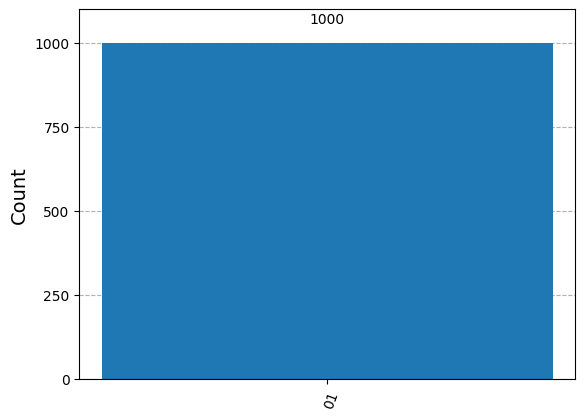

In [65]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

job = backend.run(qc_cx, shots=1000)
result = job.result()

counts = result.get_counts(qc_cx)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{CZ gate}$

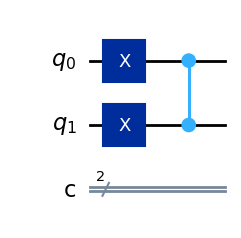

In [66]:
qc_cz = QuantumCircuit(2,2,name='qc')
qc_cz.x(0)
qc_cz.x(1)
qc_cz.cz(0,1) #CZ gate with the first bit is the control and the second bit is the target
qc_cz.draw(mpl)

$\text{density matrix for CZ gate}$

the quantum state is:  Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
            dims=(2, 2))


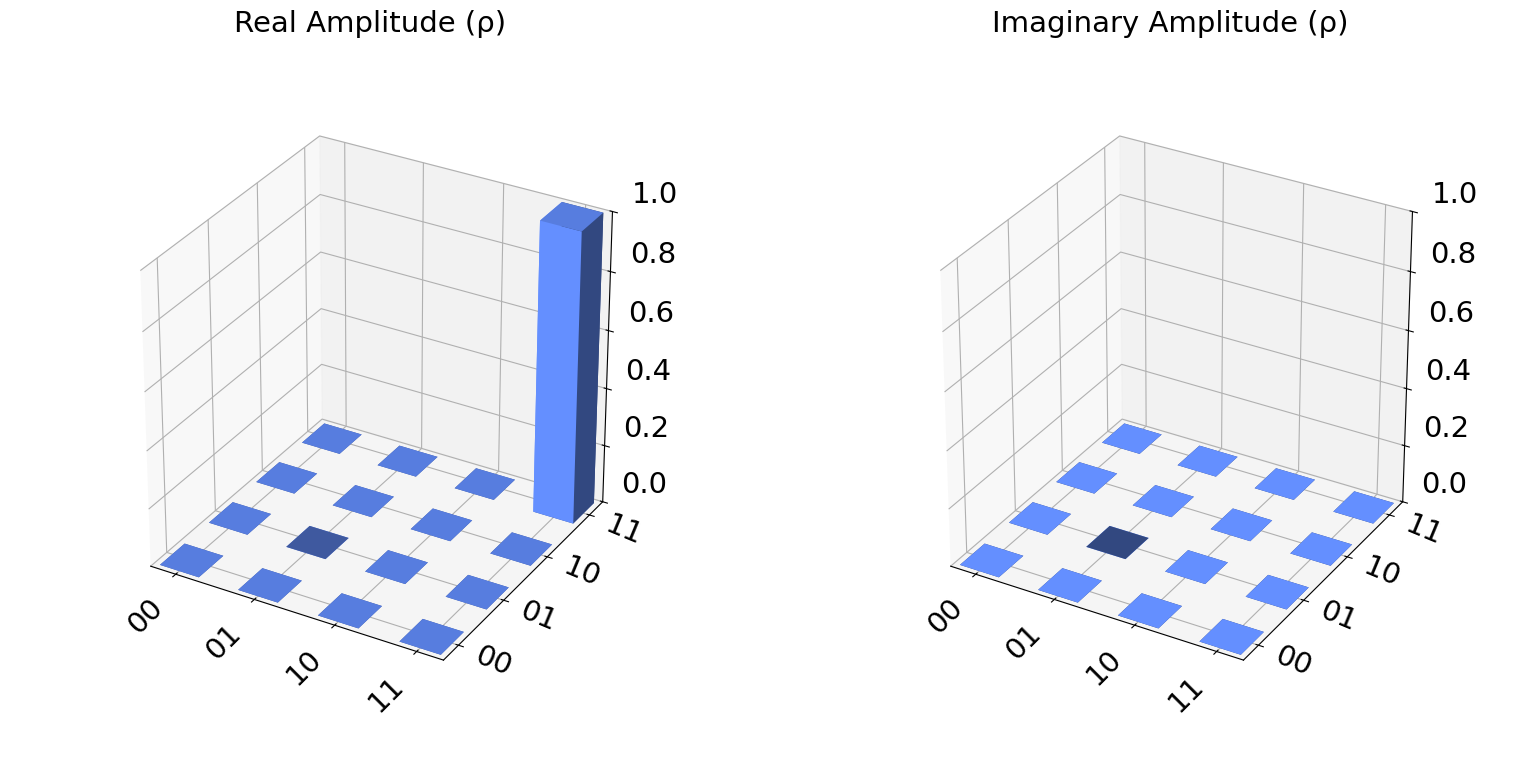

In [67]:
simulator_gate = Aer.get_backend('statevector_simulator')

#execute the circuit
job_state = simulator_gate.run(qc_cz)

#take the result from the job
result = job_state.result()

#return counts
psi = result.get_statevector(qc_cz)

print('the quantum state is: ', psi)

#plot the density matrix plot
plot_state_city(psi)

$\text{qsphere for the CZ gate}$

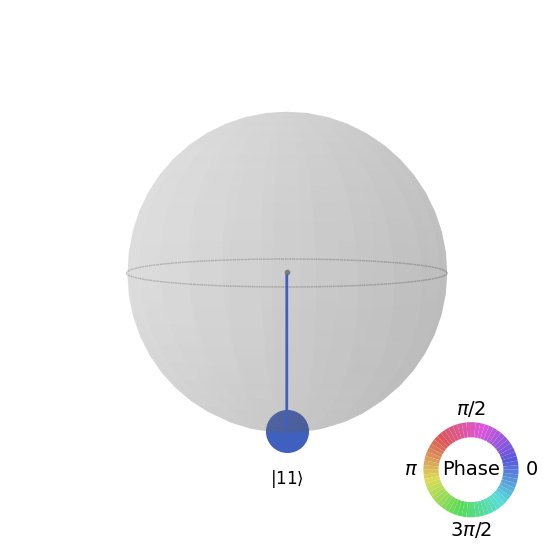

In [68]:
#plot the qsphee

psi = result.get_statevector(qc_cz)
plot_state_qsphere(psi)

$\text{Unitary Matrix for the CZ gate}$

In [69]:
#unitary

backend = Aer.get_backend('unitary_simulator')

cz_unitary = backend.run(qc_cz).result().get_unitary(qc_cz, decimals=3)

print("Circuit unitary:\n", np.asarray(cz_unitary).round(5))

Circuit unitary:
 [[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j -0.+0.j -0.+0.j -0.+0.j]]


$\text{CZ using QASM simulator}$

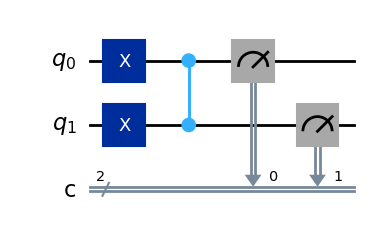

In [70]:
qc_cz = QuantumCircuit(2,2,name='qc')
qc_cz.x(0)
qc_cz.x(1)
qc_cz.cz(0,1) #CZ gate with the first bit is the control and the second bit is the target
qc_cz.measure([0,1], [0,1])
qc_cz.draw(mpl)

the total counts are:  {'11': 1000}


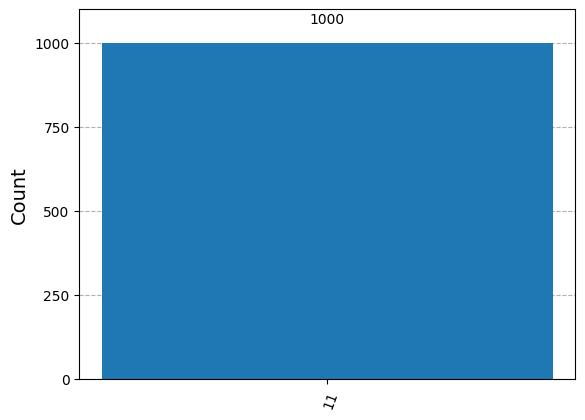

In [71]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

job = backend.run(qc_cz, shots=1000)
result = job.result()

counts = result.get_counts(qc_cz)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{CZ gate using CNOT and H gate}$

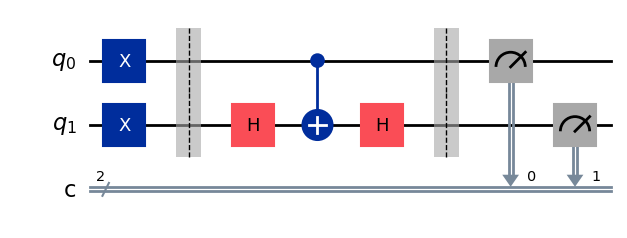

In [72]:
qc_cz = QuantumCircuit(2,2,name='qc')
qc_cz.x(0)
qc_cz.x(1)
qc_cz.barrier()
qc_cz.h(1)
qc_cz.cx(0,1)
qc_cz.h(1)
qc_cz.barrier()
qc_cz.measure([0,1], [0,1])
qc_cz.draw(mpl)

$\text{Quantum CH gate}$

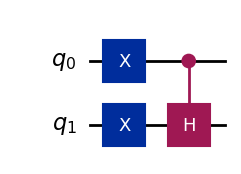

In [73]:
#CH gate on |11>
qc_ch = QuantumCircuit(2, name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)

qc_ch.draw(mpl)

$\text{density plot for CH gate}$

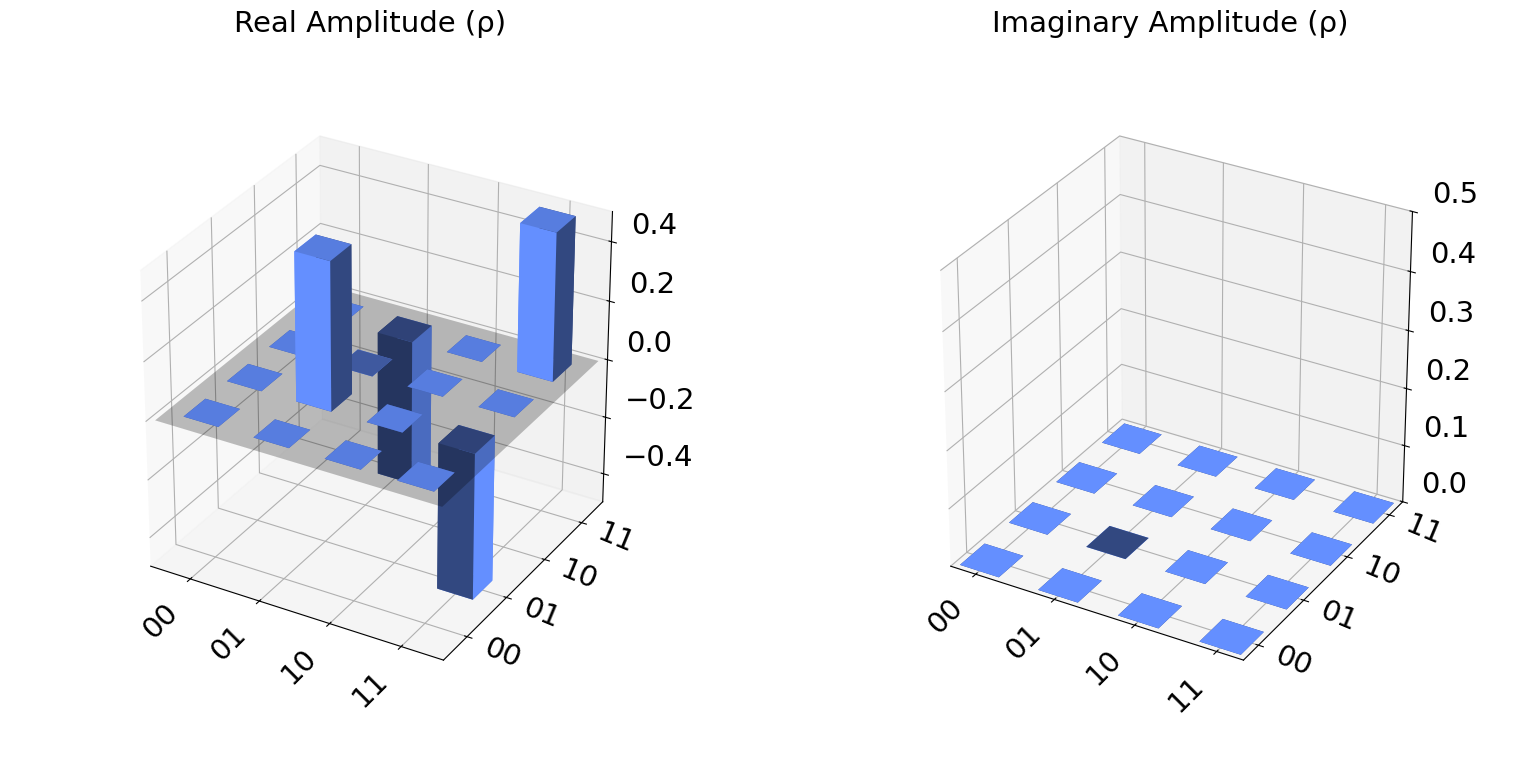

In [74]:
state_ch = DensityMatrix(qc_ch)
plot_state_city(state_ch)

$\text{Qsphere for the CH gate}$

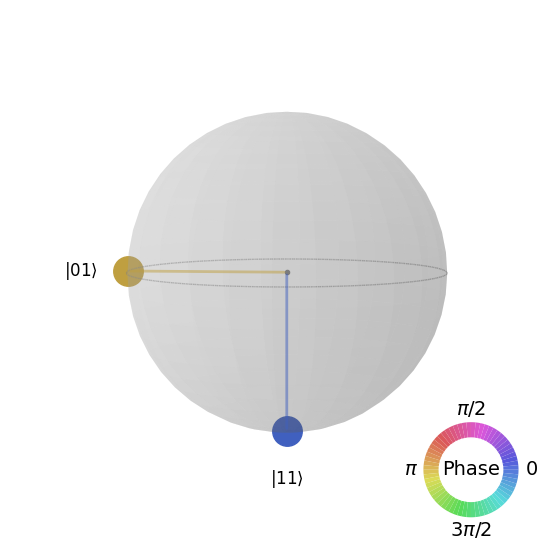

In [75]:
plot_state_qsphere(state_ch)

$\text{Unitary matrix for CH gate}$

In [76]:
#unitary
qc_ch = QuantumCircuit(2, name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)
qc_ch.save_unitary()

backend = Aer.get_backend('aer_simulator')

circ = transpile(qc_ch, backend)

result = backend.run(circ).result()
ch_unitary = result.get_unitary(circ)
print("Circuit unitary:\n", np.asarray(ch_unitary).round(5))

Circuit unitary:
 [[ 0.     +0.j -0.     +0.j  0.     +0.j  1.     -0.j]
 [ 0.70711+0.j  0.     +0.j  0.70711+0.j  0.     +0.j]
 [ 0.     +0.j  1.     -0.j  0.     +0.j -0.     +0.j]
 [-0.70711+0.j  0.     +0.j  0.70711-0.j  0.     +0.j]]


In [77]:
qc_ch = QuantumCircuit(2, name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)
circOp = Operator.from_circuit(qc_ch)
circOp.draw("latex")

<IPython.core.display.Latex object>

$\text{QASM simulator on CH gate}$

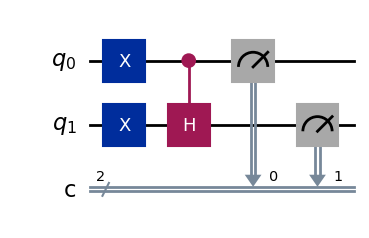

In [78]:
qc_ch = QuantumCircuit(2,2, name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)
qc_ch.measure([0,1],[0,1])
qc_ch.draw(mpl)

the total counts are:  {'11': 509, '01': 491}


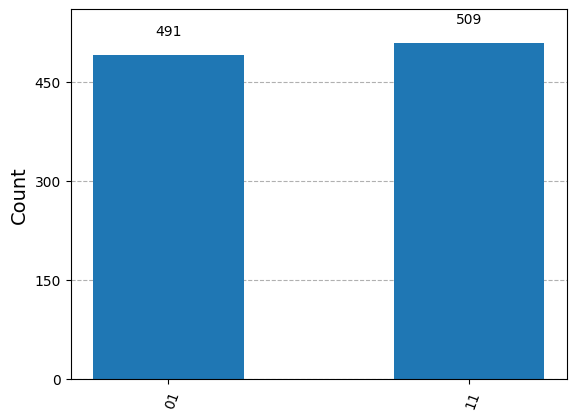

In [79]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

circ = transpile(qc_ch, backend)

job = backend.run(circ, shots=1000)



result = job.result()

counts = result.get_counts(qc_ch)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{CH gate using CNOT and Ry gate}$

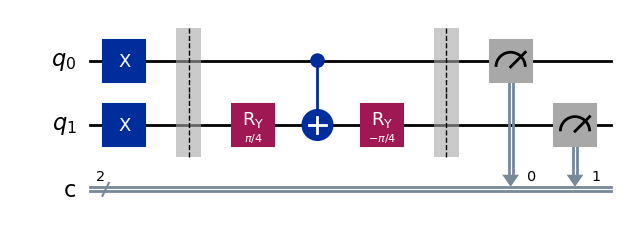

In [80]:
# CH-gate on |11> 
qc_ch = QuantumCircuit(2,2,name="qc")
qc_ch.x(0) # X Gate on 1st Qubit
qc_ch.x(1) # X Gate on 2nd Qubit
qc_ch.barrier()
qc_ch.ry(pi/4,1) # Ry Gate on 2nd Qubit
qc_ch.cx(0,1) # CNOT Gate
qc_ch.ry(-pi/4,1) # Ry Gate on 2nd Qubit
qc_ch.barrier()
qc_ch.measure([0,1],[0,1])
qc_ch.draw('mpl')

the total counts are:  {'01': 491, '11': 509}


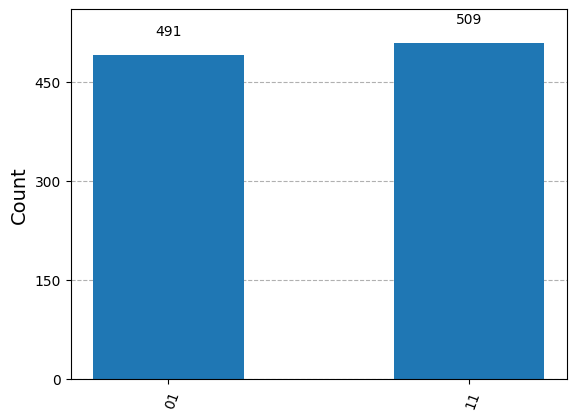

In [81]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

circ = transpile(qc_ch, backend)

job = backend.run(circ, shots=1000)



result = job.result()

counts = result.get_counts(qc_ch)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{Quantum Swap Gate}$

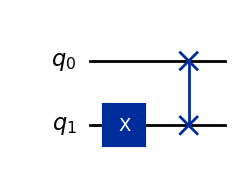

In [82]:
#Quantum Swap Gate on |01> = |10>

qc_sw = QuantumCircuit(2, name='qc')
qc_sw.x(1)

qc_sw.swap(0,1) #swap gate operation

qc_sw.draw(mpl)




$\text{Density plot for swap gate}$

The quantum state is:  Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


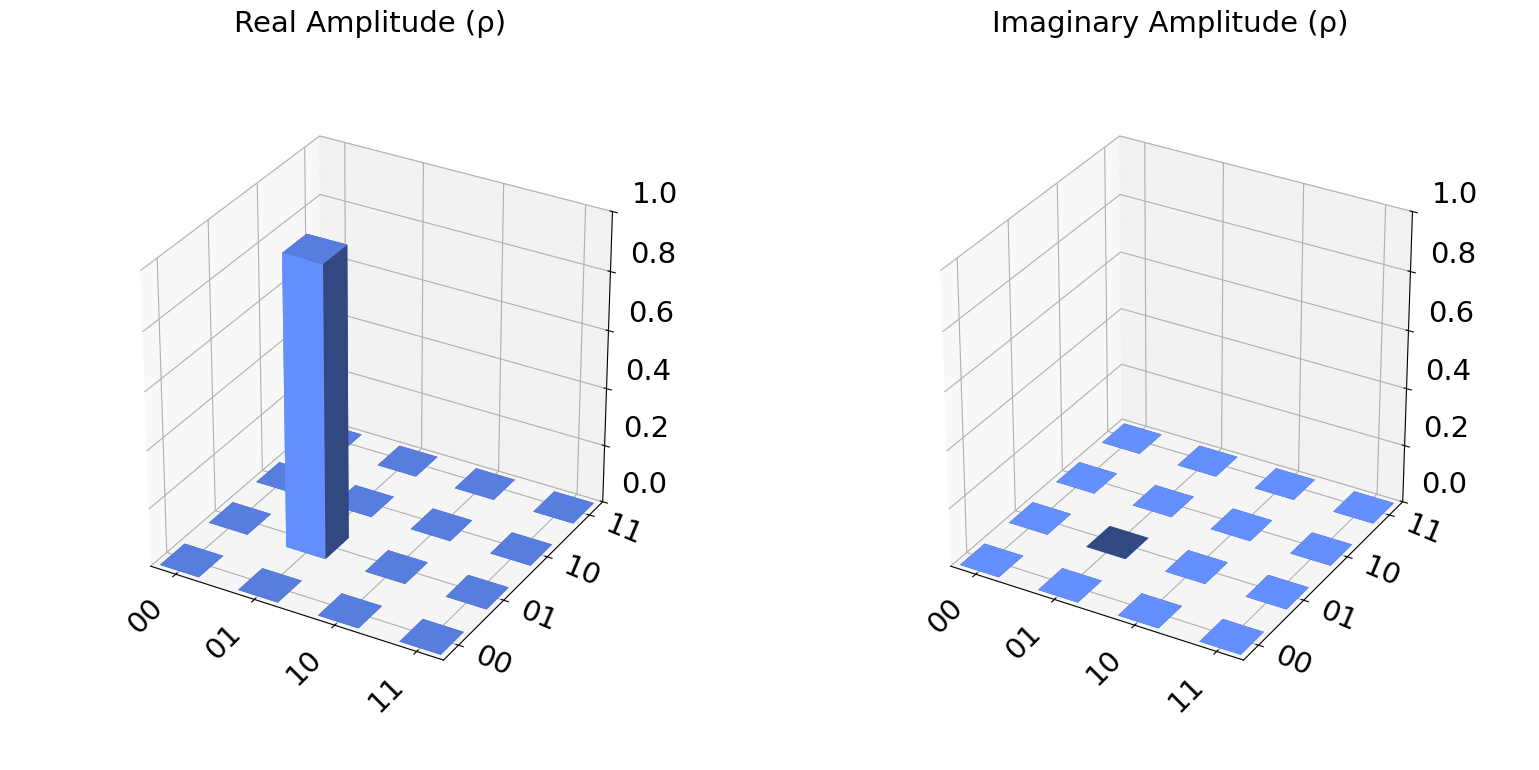

In [83]:
state_sw = DensityMatrix(qc_sw)

statevector_sw = Statevector(qc_sw)

print('The quantum state is: ',statevector_sw)

plot_state_city(state_sw)

$\text{Qsphere for swap gate}$

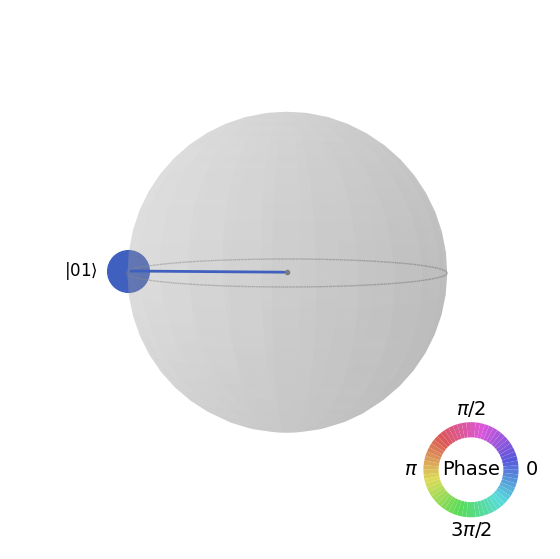

In [84]:
plot_state_qsphere(state_sw)

$\text{Unitary matrix for swap gate}$

In [85]:
#unitary
qc_sw = QuantumCircuit(2, name='qc')
qc_sw.x(1)

qc_sw.swap(0,1) #swap gate operation
qc_sw.save_unitary()

backend = Aer.get_backend('aer_simulator')

circ = transpile(qc_sw, backend)

result = backend.run(circ).result()
swap_unitary = result.get_unitary(circ)
print("Circuit unitary:\n", np.asarray(swap_unitary).round(5))

Circuit unitary:
 [[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


$\text{QASM simulator on Swap Gate}$

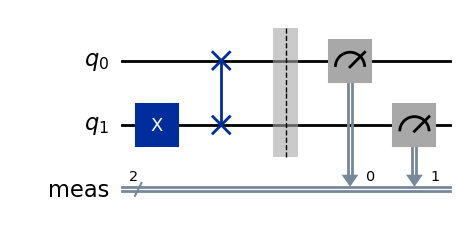

In [86]:
qc_sw = QuantumCircuit(2, name='qc')
qc_sw.x(1)
qc_sw.swap(0,1) #swap gate operation
qc_sw.measure_all()
qc_sw.draw(mpl)


the total counts are:  {'01': 1000}


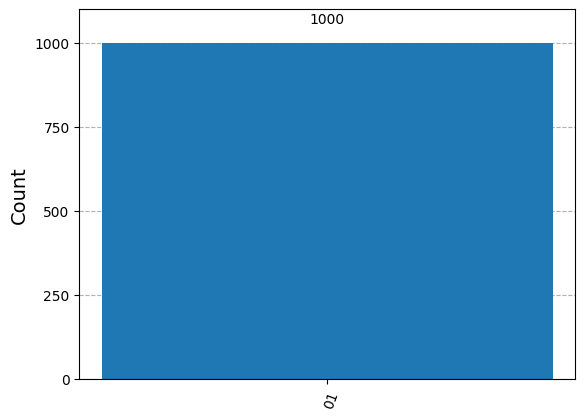

In [87]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

circ = transpile(qc_sw, backend)

job = backend.run(circ, shots=1000)



result = job.result()

counts = result.get_counts(qc_sw)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{SWAP gate using CNOT}$

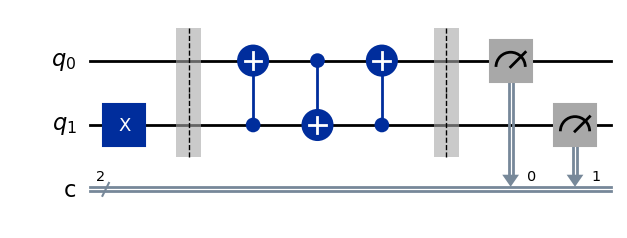

In [88]:
# SWAP Gate using CNOT - 1st Method
qc_sw = QuantumCircuit(2,2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.barrier()
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as Control
qc_sw.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as Control
qc_sw.barrier()
qc_sw.measure([0,1], [0,1])
qc_sw.draw(output='mpl')

$\text{Density Plot}$

the quantum state is:  Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


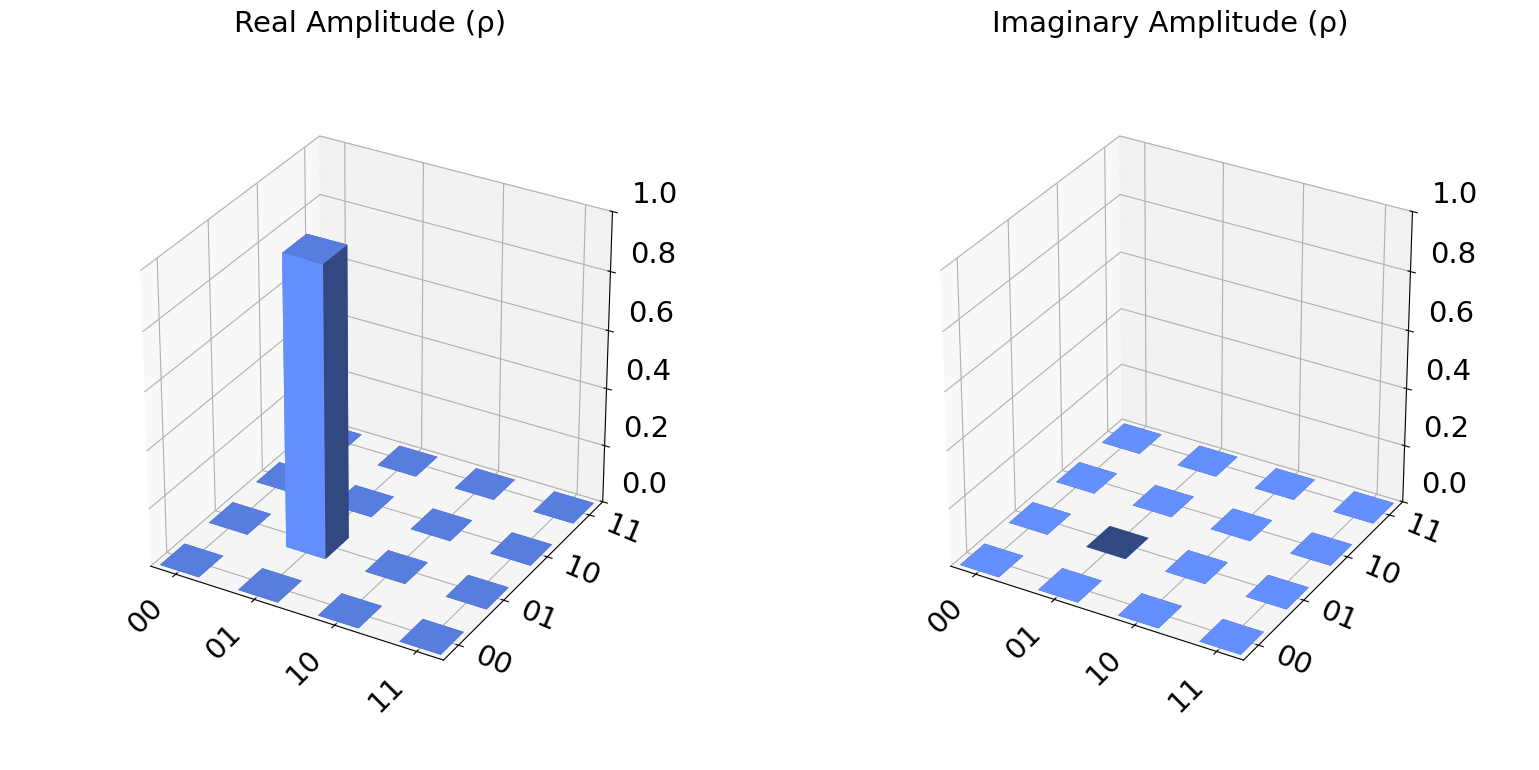

In [89]:
simulator_gate = Aer.get_backend('statevector_simulator')

circ = transpile(qc_sw, simulator_gate)

#execute the circuit
job_state = simulator_gate.run(circ)

#take the result from the job
result = job_state.result()

#return counts
psi = result.get_statevector(circ)

print('the quantum state is: ', psi)

#plot the density matrix plot
plot_state_city(psi)

$\text{Swap Gate using CNOT gate - second method}$

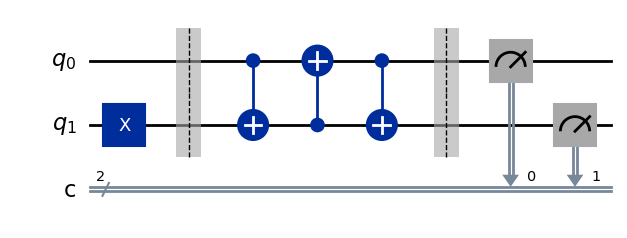

In [90]:
# SWAP Gate using CNOT - 2nd Method
qc_sw = QuantumCircuit(2,2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.barrier()
qc_sw.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_sw.cx(1,0) # CNOT with 1st as Target and 2nd as Control
qc_sw.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_sw.barrier()
qc_sw.measure([0,1],[0,1])
qc_sw.draw(output='mpl')

$\text{The Bell State}$

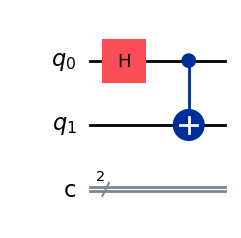

In [91]:
#The Bell State
# The Bell State
qc_bell = QuantumCircuit(2,2,name="qc")
qc_bell.h(0) # H Gate on 1st Qubit
qc_bell.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_bell.draw(output='mpl')

$\text{Density Plot for Bell State}$

the quantum state is:  Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


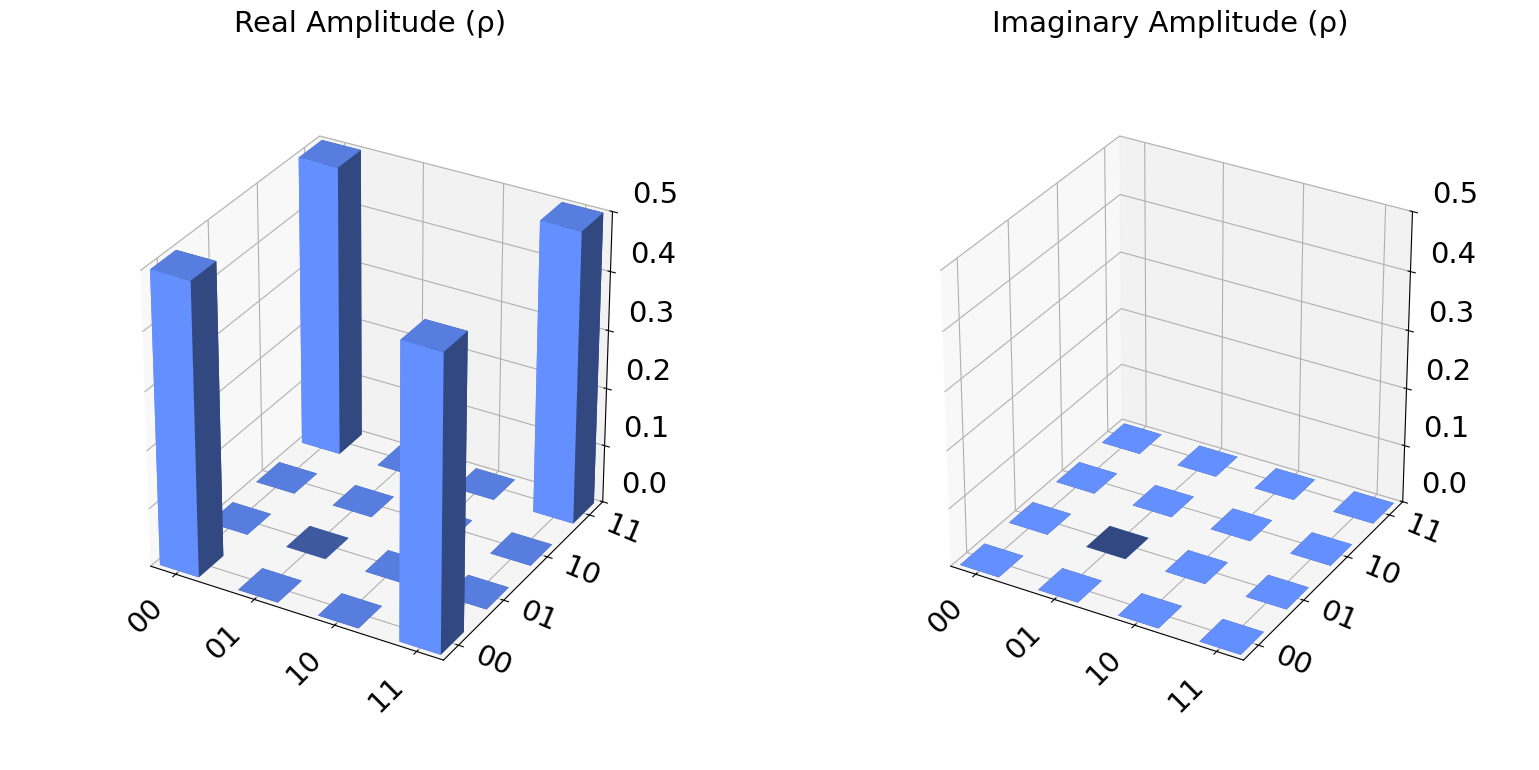

In [92]:
simulator_gate = Aer.get_backend('statevector_simulator')

circ = transpile(qc_bell, simulator_gate)

#execute the circuit
job_state = simulator_gate.run(circ)

#take the result from the job
result = job_state.result()

#return counts
psi = result.get_statevector(circ)

print('the quantum state is: ', psi)

#plot the density matrix plot
plot_state_city(psi)

$\text{Qsphere Bell state}$

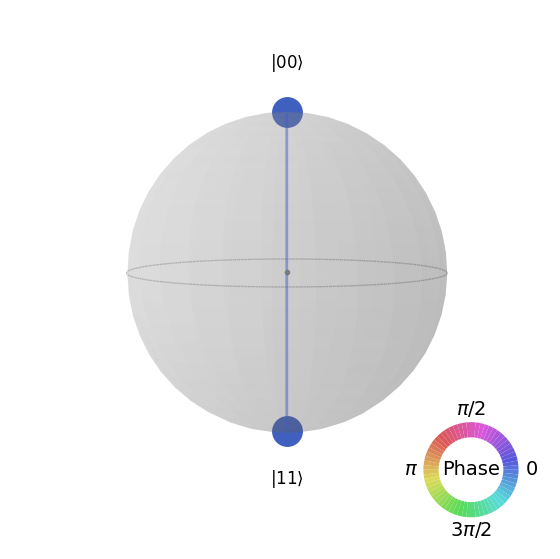

In [93]:
#plot the qsphee

psi = result.get_statevector(qc_bell)
plot_state_qsphere(psi)

$\text{Unitary Operator for Bell State}$

In [94]:
qc_bell = QuantumCircuit(2,2,name="qc")
qc_bell.h(0) # H Gate on 1st Qubit
qc_bell.cx(0,1) # CNOT with 1st as Control and 2nd as Target

qc_bell.save_unitary()

backend = Aer.get_backend('aer_simulator')

circ = transpile(qc_bell, backend)

result = backend.run(circ).result()
bell_unitary = result.get_unitary(circ)
print("Circuit unitary:\n", np.asarray(bell_unitary).round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]


In [95]:
qc_bell = QuantumCircuit(2,2,name="qc")
qc_bell.h(0) # H Gate on 1st Qubit
qc_bell.cx(0,1) # CNOT with 1st as Control and 2nd as Target

circOp = Operator.from_circuit(qc_bell)
circOp.draw("latex")

<IPython.core.display.Latex object>

$\text{QASM Simulator for Bell State}$

In [96]:
qc_bell = QuantumCircuit(2,2,name="qc")
qc_bell.h(0) # H Gate on 1st Qubit
qc_bell.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_bell.barrier()
qc_bell.measure_all()

the total counts are:  {'11 00': 473, '00 00': 527}


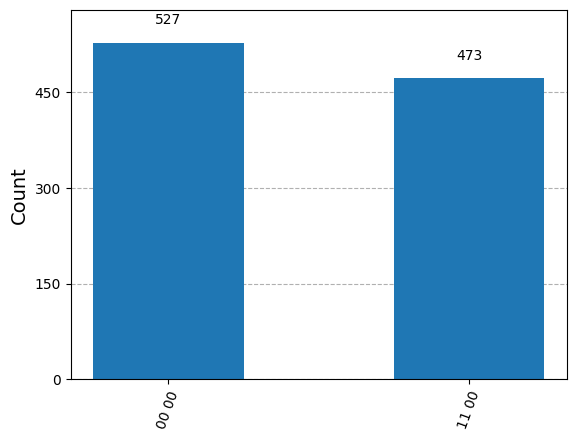

In [97]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

circ = transpile(qc_bell, backend)

job = backend.run(circ, shots=1000)



result = job.result()

counts = result.get_counts(qc_bell)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{Quantum CCX/CCNOT or Toffoli Gate}$

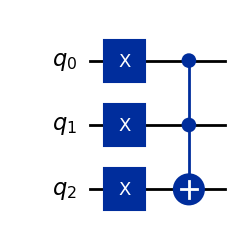

In [98]:
# CCX-gate on |111> = |110> (|011> in Qiskit ordering)
qc_ccx = QuantumCircuit(3,name="qc")
qc_ccx.x(0) # X Gate on 1st Qubit
qc_ccx.x(1) # X Gate on 2nd Qubit
qc_ccx.x(2) # X Gate on 3rd Qubit
qc_ccx.ccx(0,1,2) # CCX Gate with 1st two qubits as control and 3rd as target
qc_ccx.draw(output='mpl')


$\text{Density Matrix Plot for CCX}$

the quantum state is:  Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


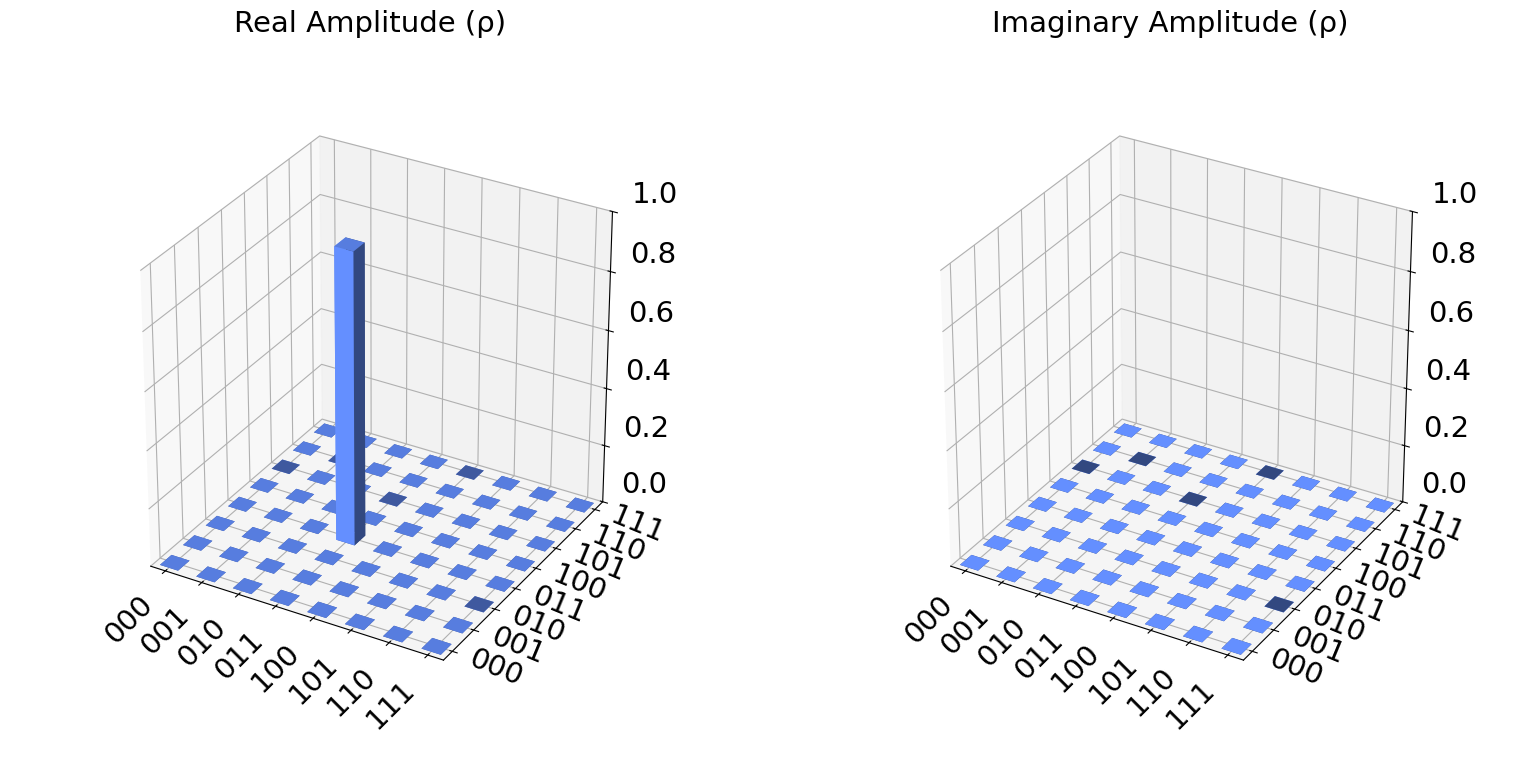

In [99]:
simulator_gate = Aer.get_backend('statevector_simulator')

circ = transpile(qc_ccx, simulator_gate)

#execute the circuit
job_state = simulator_gate.run(circ)

#take the result from the job
result = job_state.result()

#return counts
psi = result.get_statevector(circ)

print('the quantum state is: ', psi)

#plot the density matrix plot
plot_state_city(psi)

$\text{Qsphere for CXX gate}$

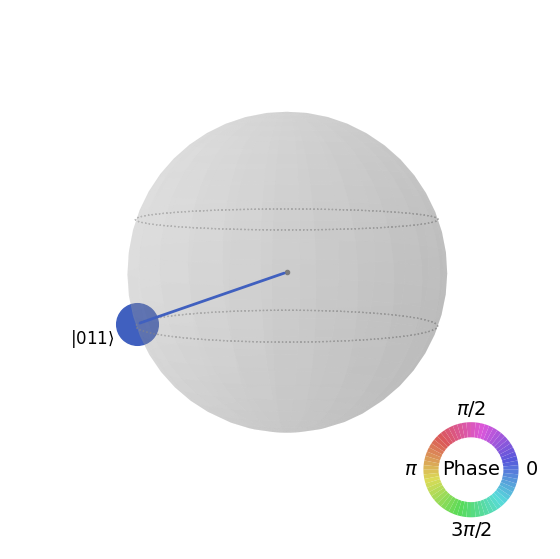

In [100]:
#plot the qsphee

psi = result.get_statevector(qc_ccx)
plot_state_qsphere(psi)

In [101]:


circOp = Operator.from_circuit(qc_ccx)
circOp.draw("latex")

<IPython.core.display.Latex object>

$\text{QASM simulator}$

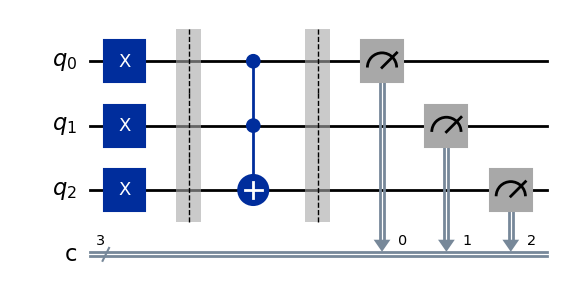

In [102]:
# CCX-gate on |111> = |110> (|011> in Qiskit ordering)
qc_ccx = QuantumCircuit(3,3,name="qc")
qc_ccx.x(0) # X Gate on 1st Qubit
qc_ccx.x(1) # X Gate on 2nd Qubit
qc_ccx.x(2) # X Gate on 3rd Qubit
qc_ccx.barrier()
qc_ccx.ccx(0,1,2) # CCX Gate with 1st two qubits as control and 3rd as target
qc_ccx.barrier()
qc_ccx.measure([0,1,2],[0,1,2])
qc_ccx.draw(output='mpl')

the total counts are:  {'011': 1000}


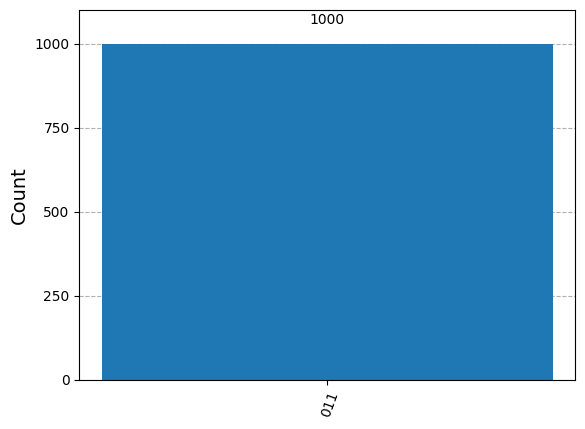

In [103]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

circ = transpile(qc_ccx, backend)

job = backend.run(circ, shots=1000)



result = job.result()

counts = result.get_counts(qc_ccx)

print("the total counts are: ", counts)

plot_histogram(counts)

$\text{CSWAP Gate - Fredkin Gate}$

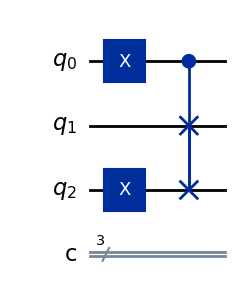

In [104]:
# CSWAP Gate on |101> = |110> (|011> in Qiskit Ordering)
qc_csw = QuantumCircuit(3,3,name="qc")
qc_csw.x(0) # X Gate on 1st Qubit
qc_csw.x(2) # X Gate on 3rd Qubit
qc_csw.cswap(0,1,2) # CSWAP Gate with 1st qubit as control and 2nd & 3rd being swapped
qc_csw.draw(output='mpl')

$\text{Density Matrix for SWAP Gate}$

the quantum state is:  Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


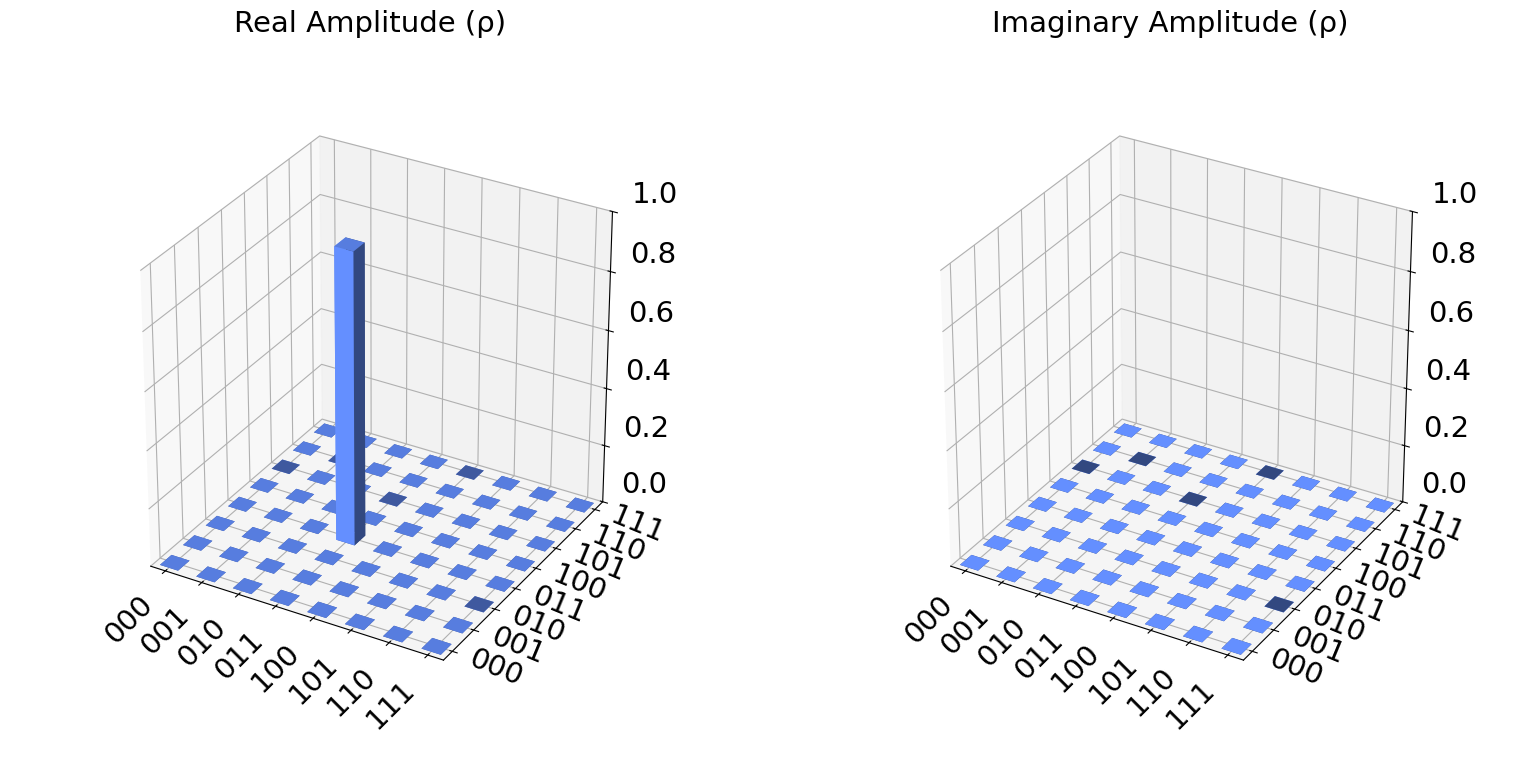

In [105]:
simulator_gate = Aer.get_backend('statevector_simulator')

circ = transpile(qc_ccx, simulator_gate)

#execute the circuit
job_state = simulator_gate.run(circ)

#take the result from the job
result = job_state.result()

#return counts
psi = result.get_statevector(circ)

print('the quantum state is: ', psi)

#plot the density matrix plot
plot_state_city(psi)

$\text{Qsphere for CSWAP gate}$

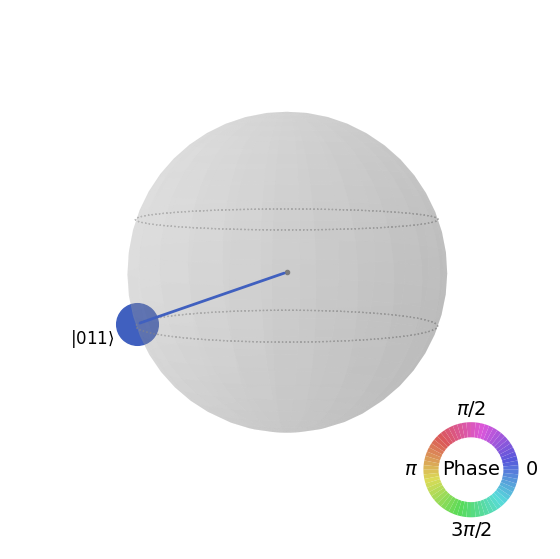

In [106]:
#plot the qsphee

psi = result.get_statevector(qc_csw)
plot_state_qsphere(psi)

$\text{Unitary operator for CSWAP}$

In [107]:

circOp = Operator.from_circuit(qc_csw)
circOp.draw("latex")

<IPython.core.display.Latex object>

$\text{QASM simulator for CSWAP}$


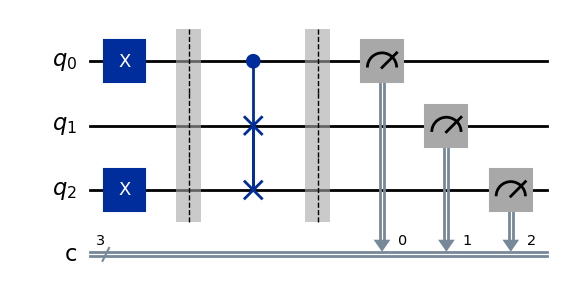

In [108]:
# CSWAP Gate on |101> = |110> (|011> in Qiskit Ordering)
qc_csw = QuantumCircuit(3,3,name="qc")
qc_csw.x(0) # X Gate on 1st Qubit
qc_csw.x(2) # X Gate on 3rd Qubit
qc_csw.barrier()
qc_csw.cswap(0,1,2) # CSWAP Gate with 1st qubit as control and 2nd & 3rd being swapped
qc_csw.barrier()
qc_csw.measure([0,1,2],[0,1,2])
qc_csw.draw(output='mpl')

the total counts are:  {'011': 1000}


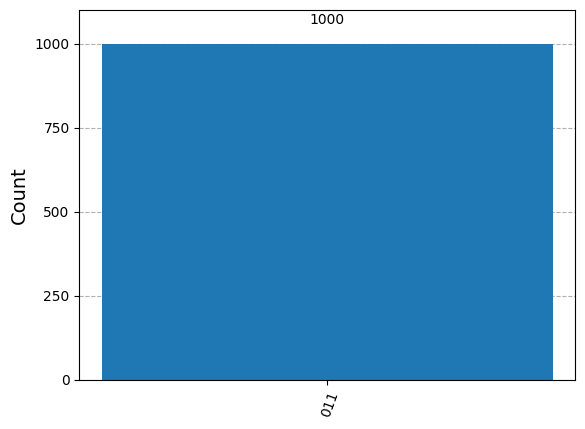

In [109]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

circ = transpile(qc_csw, backend)

job = backend.run(circ, shots=1000)



result = job.result()

counts = result.get_counts(qc_csw)

print("the total counts are: ", counts)

plot_histogram(counts)